**Anexo IV. Analisis anatómico-funcional**

**José Pedro Manzano**

**Lenguaje: Python**

En este anexo se sigue el procedimiento necesario para, a partir de las matrices de conectividad obtenidas de cada dataset, construir una red binaria de la que extraer las principales propiedades, tanto globales como locales.

Para no hacer el anexo demasiado extenso, las principales conclusiones extraídas de los resultados pueden encontrarse en la memoria del trabajo.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import community as cm #python-louvain
import statistics as st
import operator as op
import itertools
import os
import sys
from sklearn import preprocessing

**Importación de los datos**

En esta primera parte, se cargarán las matrices de conectividad individuales de cada sujeto con el objetivo de obtener un promedio de 10 sujetos de cada modalidad. También mantendremos la matriz de un sujeto de cada modalidad para realizar algunas comparaciones:

- **Redes Anatómicos (DTI)** de *sujetos sanos (healthy patients), con Alzheimer* y *Autismo*.
- **Redes Funcionales (fMRI)** de *sujetos sanos (healthy patients), con ADHD' y *Autismo*.

In [89]:
# Define the pathfiles
userpath = "/Users/hose/Desktop/TFM_TECI/"   ##### Define your work directory here and keep the tree structure

healthy_dti_path = userpath + "/Datos/Seleccionados/dti_sano/datos/"
apoe4_dti_path = userpath + "/Datos/Seleccionados/dti_alzheimer/datos/"
autism_dti_path = userpath + "/Datos/Seleccionados/dti_autism/datos/"
autism_fmri_path = userpath + "/Datos/Seleccionados/fmri_autismo/datos/"
adhd_fmri_path = userpath + "/Datos/Seleccionados/fmri_adhd/datos/"
healthy_fmri_path = userpath + "/Datos/Seleccionados/fmri_sanos/datos/"

pathfiles = [healthy_dti_path, apoe4_dti_path, autism_dti_path, autism_fmri_path, adhd_fmri_path, healthy_fmri_path]

# NAME OF NODES
hd_healthy_dti = pd.read_csv(userpath + "/Datos/Seleccionados/dti_sano/nodos/1013090_DTI_region_names_full_file.txt", header=None)
hd_apoe4_dti = pd.read_csv(userpath + "/Datos/Seleccionados/dti_alzheimer/nodos/APOE-4_2_region_names_full_file.txt", header=None)
hd_apoe4_dti = hd_apoe4_dti[0:110]
hd_autism_dti = pd.read_csv(userpath + "/Datos/Seleccionados/dti_autism/nodos/ASD47B_DTI_region_names_full_file.txt", header=None)
hd_autism_fmri = pd.read_csv(userpath + "/Datos/Seleccionados/fmri_autismo/nodos/ASD83B_rsfMRI_region_names_full_file.txt", header=None)
hd_adhd_fmri = pd.read_csv(userpath + "/Datos/Seleccionados/fmri_adhd/nodos/KKI_1018959_region_names_full_file.txt", header=None)
hd_healthy_fmri = pd.read_csv(userpath + "/Datos/Seleccionados/fmri_sanos/nodos/Baltimore_5560_region_names_full_file.txt", header=None)

node_names = [hd_healthy_dti, hd_apoe4_dti, hd_autism_dti, hd_autism_fmri, hd_adhd_fmri, hd_healthy_fmri]

## FOR THE SINGLE-SUBJECT LEVEL
individuals = {}
ind_names = ["healthy_dti_ind", "apoe4_dti_ind", "autism_dti_ind", "autism_fmri_ind", "adhd_fmri_ind", "healthy_fmri_ind"]
             
## FOR THE GROUP-LEVEL
group_avg = {}
groupnames = ["healthy_dti_group", "apoe4_dti_group", "autism_dti_group", "autism_fmri_group", "adhd_fmri_group", "healthy_fmri_group"]

In [90]:
# Load connectivity matrixes
n = 0
for i in pathfiles:
    files = os.listdir(i)
    aux = pd.read_csv(i+files[0], header=None, delim_whitespace=True)
    k = 0
    for j in files:
        if k<1:
            print("Individual subject of", ind_names[n], "is", j)
            df = pd.read_csv(i+j, header=None, delim_whitespace=True)
            np.fill_diagonal(df.values,1)   # make sure diagonal = 0
            normalized_df = preprocessing.normalize(df, norm='max')  # normalize
            #normalized_df.columns = node_names[n]
            newname = ind_names[n]
            individuals[newname] = normalized_df
        df = pd.read_csv(i+j, header=None, delim_whitespace=True)
        np.fill_diagonal(df.values,1)
        aux = aux + df
        np.fill_diagonal(aux.values,1)   # make sure diagonal = 0
        k = k + 1
    
    avg_df = aux/len(files)   # average matrix of groups subjects
    np.fill_diagonal(normalized_df,1)
    normalized_df = preprocessing.normalize(avg_df, norm='max')  # normalize 
    #normalized_df.columns = node_names[n]
    newname = groupnames[n]
    group_avg[newname] = normalized_df
    n = n + 1  #update individual counter

Individual subject of healthy_dti_ind is 1013090_DTI_connectivity_matrix_file.txt
Individual subject of apoe4_dti_ind is APOE-4_10_connectivity_matrix_file.txt
Individual subject of autism_dti_ind is ASD38D_DTI_connectivity_matrix_file.txt
Individual subject of autism_fmri_ind is ASD102_rsfMRI_connectivity_matrix_file.txt
Individual subject of adhd_fmri_ind is KKI_1018959_connectivity_matrix_file.txt
Individual subject of healthy_fmri_ind is Baltimore_5560_connectivity_matrix_file.txt


Puede ser interesante representar las matrices de conectividad (normalizadas) para tener una primera idea del aspecto de nuestros datos.

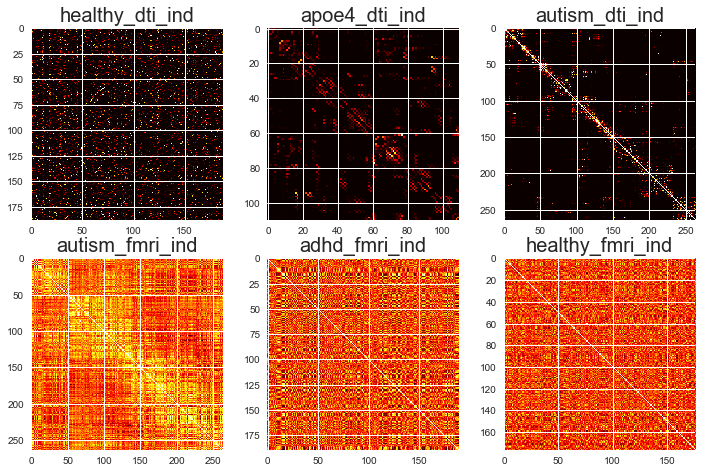

In [91]:
#BY SUBJECTS
%matplotlib inline
fig = plt.figure(figsize=(12, 12))
plt.subplot(331)
np.fill_diagonal(individuals[ind_names[0]],0)
plt.imshow(individuals[ind_names[0]], cmap='hot', interpolation='nearest')
plt.title(ind_names[0], fontsize=20)
plt.subplot(332)
np.fill_diagonal(individuals[ind_names[1]],0)
plt.imshow(individuals[ind_names[1]], cmap='hot', interpolation='nearest')
plt.title(ind_names[1], fontsize=20)
plt.subplot(333)
plt.imshow(individuals[ind_names[2]], cmap='hot', interpolation='nearest')
plt.title(ind_names[2], fontsize=20)
plt.subplot(334)
plt.imshow(individuals[ind_names[3]], cmap='hot', interpolation='nearest')
plt.title(ind_names[3], fontsize=20)
plt.subplot(335)
plt.imshow(individuals[ind_names[4]], cmap='hot', interpolation='nearest')
plt.title(ind_names[4], fontsize=20)
plt.subplot(336)
plt.imshow(individuals[ind_names[5]], cmap='hot', interpolation='nearest')
plt.title(ind_names[5], fontsize=20)
plt.savefig('/Users/hose/Desktop/TFM_TECI/simulated_data/healthy_ill_ind')

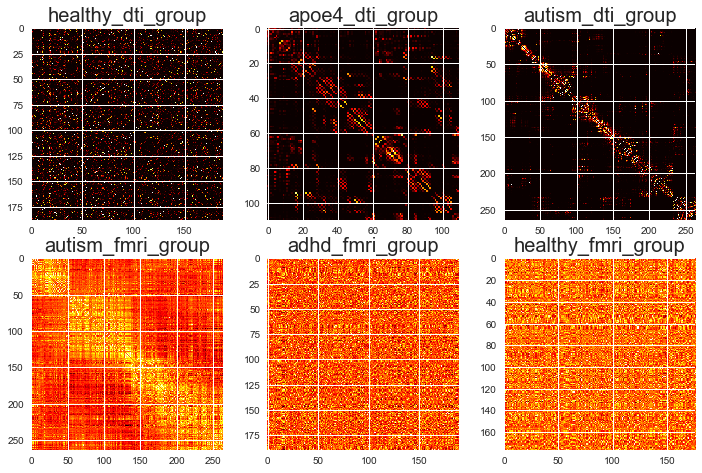

In [92]:
#BY AVERAGED GROUPS
fig2 = plt.figure(figsize=(12, 12))
plt.subplot(331)
plt.imshow(group_avg[groupnames[0]], cmap='hot', interpolation='nearest')
plt.title(groupnames[0], fontsize=20)
plt.subplot(332)
np.fill_diagonal(group_avg[groupnames[1]],0)
plt.imshow(group_avg[groupnames[1]], cmap='hot', interpolation='nearest')
plt.title(groupnames[1], fontsize=20)
plt.subplot(333)
plt.imshow(group_avg[groupnames[2]], cmap='hot', interpolation='nearest')
plt.title(groupnames[2], fontsize=20)
plt.subplot(334)
plt.imshow(group_avg[groupnames[3]], cmap='hot', interpolation='nearest')
plt.title(groupnames[3], fontsize=20)
plt.subplot(335)
plt.imshow(group_avg[groupnames[4]], cmap='hot', interpolation='nearest')
plt.title(groupnames[4], fontsize=20)
plt.subplot(336)
plt.imshow(group_avg[groupnames[5]], cmap='hot', interpolation='nearest')
plt.title(groupnames[5], fontsize=20)
plt.savefig('/Users/hose/Desktop/TFM_TECI/simulated_data/healthy_ill_group')

Parece evidente que las matrices de conectividad promedio son capaces de filtrar gran parte de la variabilidad individual en las matrices funcionales, lo que revela de forma más evidente la estructura subyacente de la red. 

En cuanto a las redes anatómicas parece no existir la misma variabilidad que en las funcionales, ya que el promedio grupal y las individuales se mantienen bastante similares.

**CONSTRUCCIÓN DEL GRAFO**

El objetivo final es comparar las propiedades de las diferentes redes y discutir si la teoría de grafos puede ser una herramienta útil o complementaria para detectar singularidades entre patologías.

Recuerda que las redes pueden contener valores negativos de correlación. Dado que no existe consenso sobre lo que implica una correlación negativa en DTI o en fMRI, se trabajará con los valores positivos en este caso.


In [93]:
np.any(individuals[ind_names[4]]<0)  # Any value below of 0? 

True

In [94]:
individuals[ind_names[4]][individuals[ind_names[4]] < 0] = 0
np.any(individuals[ind_names[4]]<0)

False

In [96]:
for i in range(0,6):
    individuals[ind_names[i]][individuals[ind_names[i]] < 0] = 0 
    group_avg[groupnames[i]][group_avg[groupnames[i]]< 0] = 0

**DEFINE THE NULL-MODELS**

A continuación se definen como modelos nulos el modelo de Erdos-Renyi, una red en estrella y una red regular con propiedades similares a las de las redes construidas.

In [97]:
n=110    # Erdos-Rengi nodes
m=1200   # Erdos-Rengi links
Grafos_ind = []
Grafos_group = []

# Creation of random graphs to compare with the brain graphs
Grandom=nx.gnm_random_graph(n,m,seed=123456789) #generador de grafo er, semilla fija
Gregular=nx.grid_2d_graph(10,11) #generador de grafo regular
Gstar=nx.star_graph(n-1) #generador de grafo en estrella

Grafos_ind.append(Grandom)
Grafos_ind.append(Gregular)
Grafos_ind.append(Gstar)

Grafos_group.append(Grandom)
Grafos_group.append(Gregular)
Grafos_group.append(Gstar)

Como se indicaba en la memoria, como cada matriz proviene de un dataset diferente, tienen un número de nodos y enlaces diferente. Se intentará solventar este problema lo máximo posible para cada modalidad, ajustando el umbral de modo que las redes de DTI tengan  un número de enlaces y nodos lo más similar posible. Ídem para las de fMRI.

In [98]:
#which = lambda lst:list(np.where(lst)[0])  # like which of R language
def num_of_zeros(xx,thr):
    np.fill_diagonal(x,0)
    xx[xx > thr] = 1
    xx[xx < thr] = 0
    current_links = np.sum(xx)#.values.sum()
    return(current_links)   #links different of 0

In [99]:
# To relabel the nodes of the graph
def dict_names(x):
    dic={}
    lista_nombres = x[0].tolist()
    lista_nodos = range(len(lista_nombres))
    dic[lista_nodos]=lista_nombres
    return(dic)

Y obtenemos las matrices de conectividad binarias tanto paras el promedio grupal como para el individual en cada modalidad:

In [101]:
## FOR THE SINGLE-SUBJECT LEVEL
thr_ind = []
mat_ind = []
n = 0

for subject_i in individuals:
    x = individuals[subject_i]
    thr = 0.1
    print("Next subject!!!",subject_i)
    flag_error = 0
    flag_if = 0
    flag_else = 0
    while (abs(m - num_of_zeros(x,thr))>150 and (flag_error<2) and (thr<0.7)):       # while links in x > m, increase the threshold -- thr<0.7 stopping condition
        flag_error = flag_if + flag_else  # to avoid starting to jump into the if and the else (infinite loop)
        if (m < num_of_zeros(x,thr)):
            thr = thr + 0.03
            flag_if = 1
        else:
            thr = thr - 0.03
            flag_else = 1
    x[x > thr] = 1
    x[x < thr] = 0
    matrizAdy = np.matrix(x)
    mat_ind.append(matrizAdy)
    thr_ind.append(thr)
    G_ind = nx.from_numpy_matrix(matrizAdy)
    G_ind.name = "Graph_" + subject_i
    nx.relabel_nodes(G_ind, dict_names(node_names[n]))
    Grafos_ind.append(G_ind)
    n = n + 1

Next subject!!! healthy_dti_ind
Next subject!!! apoe4_dti_ind
Next subject!!! autism_dti_ind
Next subject!!! autism_fmri_ind
Next subject!!! adhd_fmri_ind
Next subject!!! healthy_fmri_ind


In [102]:
## FOR THE GROUP LEVEL
thr_group = []
mat_group = []
n = 0

for group_i in group_avg:
    x = group_avg[group_i]
    thr = 0.1
    print("Next group average!!!", group_i)
    flag_error = 0
    flag_if = 0
    flag_else = 0
    while (abs(m - num_of_zeros(x,thr))>150 and (flag_error<2) and (thr<0.7)):       # while links in x > m, increase the threshold -- thr<0.7 stopping condition
        flag_error = flag_if + flag_else  # to avoid starting to jump into the if and the else (infinite loop)
        if (m < num_of_zeros(x,thr)):
            thr = thr + 0.03
            flag_if = 1
        else:
            thr = thr - 0.03
            flag_else = 1
    x[x > thr] = 1
    x[x < thr] = 0
    
    matrizAdy = np.matrix(x)
    mat_group.append(matrizAdy)
    
    thr_group.append(thr)
    G_group = nx.from_numpy_matrix(matrizAdy)
    G_group.name = "Graph_" + group_i
    nx.relabel_nodes(G_group, dict_names(node_names[n]))
    Grafos_group.append(G_group)
    n = n + 1

Next group average!!! healthy_dti_group
Next group average!!! apoe4_dti_group
Next group average!!! autism_dti_group
Next group average!!! autism_fmri_group
Next group average!!! adhd_fmri_group
Next group average!!! healthy_fmri_group


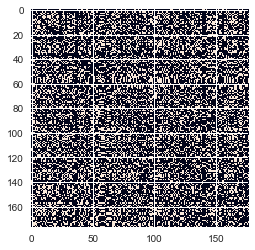

In [103]:
plt.imshow(group_avg[group_i])

In [104]:
group_avg[group_i]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**ANÁLSIS I I - CARACTERÍSTICAS GLOBALES DE LA RED**

In [105]:
## INDIVIDUAL SUBJECTS TABLE
tabla1 = []
tabla2 = []
tabla3 = []
for i in range(3,len(Grafos_ind)):
    tabla1.append(len(nx.nodes(Grafos_ind[i])))
    tabla2.append(len(nx.edges(Grafos_ind[i])))
    tabla3.append(thr_ind[i-3])

columnas=['Healthy_DTI','Alzheimer_DTI','Autism_DTI','Autism_fMRI','ADHD_fMRI','Healthy_fMRI']
ind = {0:'Nodes',1:'Edges',2:'Threshold'}
tabla= pd.DataFrame([tabla1,tabla2,tabla3],columns=columnas)
tabla.rename(index=ind)

Healthy_DTI  Alzheimer_DTI  Autism_DTI  Autism_fMRI  ADHD_fMRI  \
Nodes            188.0         110.00       264.0        264.0      190.0   
Edges           2069.0        5995.00      1646.0      12820.0     6459.0   
Threshold          0.7           0.04         0.7          0.7        0.7   

           Healthy_fMRI  
Nodes             177.0  
Edges            5313.0  
Threshold           0.7

In [106]:
## GROUP TABLE
tabla1 = []
tabla2 = []
tabla3 = []
for i in range(3,len(Grafos_group)):
    tabla1.append(len(nx.nodes(Grafos_group[i])))
    tabla2.append(len(nx.edges(Grafos_group[i])))
    tabla3.append(thr_group[i-3])
    
columnas=['Healthy_DTI','Alzheimer_DTI','Autism_DTI','Autism_fMRI','ADHD_fMRI','Healthy_fMRI']
ind = {0:'Nodes',1:'Edges',2:'Threshold'}
tabla= pd.DataFrame([tabla1,tabla2,tabla3],columns=columnas)
tabla.rename(index=ind)

Healthy_DTI  Alzheimer_DTI  Autism_DTI  Autism_fMRI  ADHD_fMRI  \
Nodes            188.0         110.00       264.0        264.0      190.0   
Edges           2224.0        5995.00      1873.0      10649.0     5880.0   
Threshold          0.7           0.04         0.7          0.7        0.7   

           Healthy_fMRI  
Nodes             177.0  
Edges            5440.0  
Threshold           0.7

In [107]:
# CARACHTERISTICS OF INDIVIDUAL-SUBJECTS GRAPH
Gcluster_ind=[]
Gdegree_ind=[]
Gbet_ind=[]
Gclo_ind=[]
Geff_ind=[]
Gasor_ind=[]
Gseg_ind=[]
Gint_ind=[]
Gpath_ind=[]

for i in range(len(Grafos_ind)):
    aux_degree = 0
    for v in Grafos_ind[i].nodes():
        aux_degree= aux_degree + Grafos_ind[i].degree(v)
    Gcluster_ind.append(nx.average_clustering(Grafos_ind[i]))
    Gdegree_ind.append((aux_degree)/(len(Grafos_ind[i].nodes())))
    Gbet_ind.append(st.mean(list(nx.betweenness_centrality(Grafos_ind[i]).values())))
    Gclo_ind.append(st.mean(list(nx.closeness_centrality(Grafos_ind[i]).values())))
    Geff_ind.append(nx.global_efficiency(Grafos_ind[i]))
    Gpath_ind.append(nx.average_shortest_path_length(Grafos_ind[i]))
    Gasor_ind.append(nx.degree_assortativity_coefficient(Grafos_ind[i]))
    Gseg_ind.append(Gcluster_ind[i]/Gcluster_ind[0]) #se considera el grafo e-r
    Gint_ind.append(Gpath_ind[i]/Gpath_ind[0])#integración con la eficiencia(en lugar del path)

/Applications/anaconda3/lib/python3.6/site-packages/networkx/algorithms/assortativity/correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


In [108]:
# CARACHTERISTICS OF AVERAGE GROUPS GRAPH

Gcluster_group=[]
Gdegree_group=[]
Gbet_group=[]
Gclo_group=[]
Geff_group=[]
Gasor_group=[]
Gseg_group=[]
Gint_group=[]
Gpath_group=[]

for i in range(len(Grafos_group)):
    aux_degree = 0
    for v in Grafos_group[i].nodes():
        aux_degree= aux_degree + Grafos_group[i].degree(v)
    Gcluster_group.append(nx.average_clustering(Grafos_group[i]))
    Gdegree_group.append((aux_degree)/(len(Grafos_group[i].nodes())))
    Gbet_group.append(st.mean(list(nx.betweenness_centrality(Grafos_group[i]).values())))
    Gclo_group.append(st.mean(list(nx.closeness_centrality(Grafos_group[i]).values())))
    Geff_group.append(nx.global_efficiency(Grafos_group[i]))
    Gpath_group.append(nx.average_shortest_path_length(Grafos_group[i]))
    Gasor_group.append(nx.degree_assortativity_coefficient(Grafos_group[i]))
    Gseg_group.append(Gcluster_group[i]/Gcluster_group[0]) #se considera el grafo e-r
    Gint_group.append(Gpath_group[i]/Gpath_group[0])#integración con la eficiencia(en lugar del path)

/Applications/anaconda3/lib/python3.6/site-packages/networkx/algorithms/assortativity/correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


Podemos mostrar las propiedades extraídas en una tabla para las redes individuales:

In [109]:
# SUMMARY TABLE OF INDIVIDUAL GRAPHS
columnas=['Erdos-Renyi','Regular-Graph','Star-Graph','Sano_DTI','Alzheimer_DTI','Autismo_DTI','Autismo_fMRI','ADHD_fMRI','Sano_fMRI']
ind = {0:'Clustering',1:'Grado Medio',2:'Betweenness Centrality',3:'Closeness Centrality',4:'Global Efficiency',5:'Average Shortest Path',6:'Asortatividad',7:'Segregación(SW)',8:'Integración(SW)'}
tabla= pd.DataFrame([Gcluster_ind,Gdegree_ind,Gbet_ind,Gclo_ind,Geff_ind,Gpath_ind,Gasor_ind,Gseg_ind,Gint_ind],columns=columnas)
tabla.rename(index=ind)

Erdos-Renyi  Regular-Graph  Star-Graph   Sano_DTI  \
Clustering                 0.196564       0.000000    0.000000   0.551587   
Grado Medio               21.818182       3.618182    1.981818  22.010638   
Betweenness Centrality     0.007486       0.055556    0.009091   0.007207   
Closeness Centrality       0.553271       0.146311    0.506829   0.432862   
Global Efficiency          0.598638       0.208476    0.509091   0.486311   
Average Shortest Path      1.808507       7.000000    1.981818   2.340539   
Asortatividad             -0.001453       0.575822   -1.000000   0.097217   
Segregación(SW)            1.000000       0.000000    0.000000   2.806150   
Integración(SW)            1.000000       3.870596    1.095831   1.294183   

                        Alzheimer_DTI  Autismo_DTI  Autismo_fMRI  ADHD_fMRI  \
Clustering                   1.000000     0.427841      0.597563   0.605709   
Grado Medio                109.000000    12.469697     97.121212  67.989474   
Betweenness Centrality       0.000000     0.008094      0.002417   0.003441   
Closeness Centrality         1.000000     0.324983      0.612688   0.607637   
Global Efficiency            1.000000     0.366363      0.684209   0.678752   
Average Shortest Path        1.000000     3.120607      1.633310   1.646951   
Asortatividad                     NaN     0.281060      0.138660   0.042546   
Segregación(SW)              5.087409     2.176601      3.040048   3.081489   
Integración(SW)              0.552942     1.725516      0.903126   0.910669   

                        Sano_fMRI  
Clustering               0.530262  
Grado Medio             60.033898  
Betweenness Centrality   0.003789  
Closeness Centrality     0.602223  
Global Efficiency        0.669845  
Average Shortest Path    1.663136  
Asortatividad            0.221284  
Segregación(SW)          2.697657  
Integración(SW)          0.919618

Y para las redes grupales:

In [110]:
# SUMMARY TABLE OF GROUP GRAPHS
columnas=['Erdos-Renyi','Regular-Graph','Star-Graph','Sano_DTI','Alzheimer_DTI','Autismo_DTI','Autismo_fMRI','ADHD_fMRI','Sano_fMRI']
ind = {0:'Clustering',1:'Grado Medio',2:'Betweenness Centrality',3:'Closeness Centrality',4:'Global Efficiency',5:'Average Shortest Path',6:'Asortatividad',7:'Segregación(SW)',8:'Integración(SW)'}
tabla= pd.DataFrame([Gcluster_group,Gdegree_group,Gbet_group,Gclo_group,Geff_group,Gpath_group,Gasor_group,Gseg_group,Gint_group],columns=columnas)
tabla.rename(index=ind)

Erdos-Renyi  Regular-Graph  Star-Graph   Sano_DTI  \
Clustering                 0.196564       0.000000    0.000000   0.576154   
Grado Medio               21.818182       3.618182    1.981818  23.659574   
Betweenness Centrality     0.007486       0.055556    0.009091   0.006938   
Closeness Centrality       0.553271       0.146311    0.506829   0.442138   
Global Efficiency          0.598638       0.208476    0.509091   0.497207   
Average Shortest Path      1.808507       7.000000    1.981818   2.290534   
Asortatividad             -0.001453       0.575822   -1.000000   0.040178   
Segregación(SW)            1.000000       0.000000    0.000000   2.931133   
Integración(SW)            1.000000       3.870596    1.095831   1.266533   

                        Alzheimer_DTI  Autismo_DTI  Autismo_fMRI  ADHD_fMRI  \
Clustering                   1.000000     0.475642      0.568661   0.522363   
Grado Medio                109.000000    14.189394     80.674242  61.894737   
Betweenness Centrality       0.000000     0.007950      0.002684   0.003592   
Closeness Centrality         1.000000     0.328346      0.587804   0.597662   
Global Efficiency            1.000000     0.373133      0.651731   0.663279   
Average Shortest Path        1.000000     3.082959      1.703105   1.675299   
Asortatividad                     NaN     0.269762      0.202035   0.162572   
Segregación(SW)              5.087409     2.419786      2.893010   2.657476   
Integración(SW)              0.552942     1.704698      0.941719   0.926344   

                        Sano_fMRI  
Clustering               0.568543  
Grado Medio             61.468927  
Betweenness Centrality   0.003765  
Closeness Centrality     0.604267  
Global Efficiency        0.673269  
Average Shortest Path    1.658898  
Asortatividad            0.395006  
Segregación(SW)          2.892411  
Integración(SW)          0.917275

**ANÁLISIS II - PROPIEDADES LOCALES DE LA RED**

De manera similar, podemos extraer las mismas propiedades para cada nodo en lugar de para toda la red.

In [111]:
## FOR INDIVIDUAL SUBJECTS
Local_prox_ind = []
Local_bet_ind = []
Local_clo_ind = []
Local_cluster_ind = []
Grado_node_ind = []
for i in range(0,len(Grafos_ind)):
    Local_prox_ind.append(nx.average_neighbor_degree(Grafos_ind[i]))
    Local_bet_ind.append(nx.betweenness_centrality(Grafos_ind[i]))
    Local_clo_ind.append(nx.closeness_centrality(Grafos_ind[i]))
    Local_cluster_ind.append(nx.clustering(Grafos_ind[i]))
    grado_ind={}
    for v in Grafos_ind[i].nodes():
            grado_ind[v]=Grafos_ind[i].degree(v)
    Grado_node_ind.append(grado_ind)
    
for i in range(0,len(Grafos_ind)):
    Local_prox_ind[i] = sorted(Local_prox_ind[i].items(),reverse=True,key=op.itemgetter(1))
    Local_bet_ind[i] = sorted(Local_bet_ind[i].items(),reverse=True,key=op.itemgetter(1))
    Local_clo_ind[i] = sorted(Local_clo_ind[i].items(),reverse=True,key=op.itemgetter(1))
    Local_cluster_ind[i] = sorted(Local_cluster_ind[i].items(),reverse=True,key=op.itemgetter(1))
    Grado_node_ind[i] = sorted(Grado_node_ind[i].items(),reverse=True,key=op.itemgetter(1))

In [112]:
## FOR GROUP AVERAGE SUBJECTS
Local_prox_group = []
Local_bet_group = []
Local_clo_group = []
Local_cluster_group = []
Grado_node_group = []
for i in range(0,len(Grafos_group)):
    Local_prox_group.append(nx.average_neighbor_degree(Grafos_group[i]))
    Local_bet_group.append(nx.betweenness_centrality(Grafos_group[i]))
    Local_clo_group.append(nx.closeness_centrality(Grafos_group[i]))
    Local_cluster_group.append(nx.clustering(Grafos_group[i]))
    grado_group={}
    for v in Grafos_group[i].nodes():
            grado_group[v]=Grafos_group[i].degree(v)
    Grado_node_group.append(grado_group)
    
for i in range(0,len(Grafos_group)):
    Local_prox_group[i] = sorted(Local_prox_group[i].items(),reverse=True,key=op.itemgetter(1))
    Local_bet_group[i] = sorted(Local_bet_group[i].items(),reverse=True,key=op.itemgetter(1))
    Local_clo_group[i] = sorted(Local_clo_group[i].items(),reverse=True,key=op.itemgetter(1))
    Local_cluster_group[i] = sorted(Local_cluster_group[i].items(),reverse=True,key=op.itemgetter(1))
    Grado_node_group[i] = sorted(Grado_node_group[i].items(),reverse=True,key=op.itemgetter(1))

In [113]:
## SUMMARY TABLE
def local_properties(graph_x, propertie_x):
    indc={0:'Erdos-Renyi',1:'Regular-Graph',2:'Star-Graph',3:'Healthy_DTI',4:'Alzheimer_DTI',5:'Autism_DTI',6:'Autism_fMRI',7:'ADHD_fMRI',8:'Healthy_fMRI'}
    lista=[]
    for i in range(0,len(graph_x)):
        lista.append(itertools.islice(propertie_x[i],0,4))
    tabla_x= pd.DataFrame(lista)
    tabla_x.rename(index=indc)
    return(tabla_x)

En este caso, resumir y mostrar la información es algo más complejo (como se vio antes, son cientos de nodos). Por ello, mostraremos el valor de los 4 nodos más extremos para cada propiedad, en forma de pares de valor (nodo, valor) para tener una idea:

**SHORT PATH LENGHTS**

*INDIVIDUAL SUBJECTS*

In [61]:
indc={0:'Erdos-Renyi',1:'Regular-Graph',2:'Star-Graph',3:'Healthy_DTI',4:'Alzheimer_DTI',5:'Autism_DTI',6:'Autism_fMRI',7:'ADHD_fMRI',8:'Healthy_fMRI'}
columns = {}

In [62]:
local_properties(Grafos_ind, Local_prox_ind).rename(index=indc)

0                         1  \
Erdos-Renyi                   (47, 24.3)   (67, 24.11764705882353)   
Regular-Graph              ((2, 2), 4.0)             ((2, 3), 4.0)   
Star-Graph                    (1, 109.0)                (2, 109.0)   
Healthy_DTI       (3, 36.26315789473684)  (43, 35.666666666666664)   
Alzheimer_DTI    (12, 15.76923076923077)   (8, 15.666666666666666)   
Autism_DTI                    (55, 20.4)  (51, 19.727272727272727)   
Autism_fMRI    (136, 105.63106796116504)   (87, 105.1304347826087)   
ADHD_fMRI       (163, 78.33333333333333)  (118, 78.02409638554217)   
Healthy_fMRI      (68, 80.0657894736842)   (58, 79.62790697674419)   

                                       2                          3  
Erdos-Renyi     (92, 24.076923076923077)   (69, 23.666666666666668)  
Regular-Graph              ((2, 4), 4.0)              ((2, 5), 4.0)  
Star-Graph                    (3, 109.0)                 (4, 109.0)  
Healthy_DTI    (186, 33.357142857142854)                 (4, 33.35)  
Alzheimer_DTI                 (7, 15.25)              (73, 14.9375)  
Autism_DTI                   (97, 19.45)  (109, 19.357142857142858)  
Autism_fMRI     (68, 105.03658536585365)  (232, 104.76576576576576)  
ADHD_fMRI                     (96, 78.0)                (159, 78.0)  
Healthy_fMRI      (85, 79.6067415730337)    (107, 79.4054054054054)

*GROUP AVERAGE*

In [ ]:
local_properties(Grafos_group, Local_prox_group).rename(index=indc)

**BETWENNESS**

*INDIVIDUAL SUBJECTS*

In [64]:
local_properties(Grafos_ind, Local_bet_ind).rename(index=indc)

0                              1  \
Erdos-Renyi       (99, 0.014691107624638211)      (59, 0.01445917683048305)   
Regular-Graph  ((4, 5), 0.12317750678824708)  ((5, 5), 0.12317750678824702)   
Star-Graph                          (0, 1.0)                       (1, 0.0)   
Healthy_DTI       (18, 0.060822427403918015)    (124, 0.052536864647576446)   
Alzheimer_DTI      (26, 0.09448485800450983)      (29, 0.08366961197166296)   
Autism_DTI          (61, 0.0738479674453349)      (94, 0.07131238961409556)   
Autism_fMRI      (230, 0.005618113772020311)    (257, 0.005394094206358545)   
ADHD_fMRI        (182, 0.009965574773996266)     (85, 0.009915206785946235)   
Healthy_fMRI      (50, 0.010623342630312749)     (40, 0.007367022246358978)   

                                           2                              3  
Erdos-Renyi       (19, 0.014047183900834929)        (42, 0.013750404203352)  
Regular-Graph  ((5, 4), 0.11884780954126385)  ((5, 6), 0.11884780954126385)  
Star-Graph                          (2, 0.0)                       (3, 0.0)  
Healthy_DTI        (28, 0.05178185478985241)      (32, 0.04439177829633221)  
Alzheimer_DTI      (56, 0.06044706928717459)      (85, 0.05998581673615049)  
Autism_DTI       (195, 0.058677587257606724)      (63, 0.05333199200741908)  
Autism_fMRI        (91, 0.00536511674554631)     (62, 0.005095467814654273)  
ADHD_fMRI        (132, 0.007605799398216297)     (34, 0.007545934090884662)  
Healthy_fMRI    (117, 0.0068622504758469715)     (93, 0.006639537731329414)

*GROUP AVERAGE*

In [65]:
local_properties(Grafos_group, Local_bet_group).rename(index=indc)

0                              1  \
Erdos-Renyi       (99, 0.014691107624638211)      (59, 0.01445917683048305)   
Regular-Graph  ((4, 5), 0.12317750678824708)  ((5, 5), 0.12317750678824702)   
Star-Graph                          (0, 1.0)                       (1, 0.0)   
Healthy_DTI       (137, 0.06044882035598517)     (18, 0.053623443064305935)   
Alzheimer_DTI                       (0, 0.0)                       (1, 0.0)   
Autism_DTI        (114, 0.07322392222561284)     (195, 0.06536875695098289)   
Autism_fMRI      (188, 0.007878824490298208)     (51, 0.007673799008738922)   
ADHD_fMRI        (128, 0.008170652790822923)     (74, 0.008076242711278757)   
Healthy_fMRI      (54, 0.015531810072773832)    (157, 0.010124987246980726)   

                                           2                              3  
Erdos-Renyi       (19, 0.014047183900834929)        (42, 0.013750404203352)  
Regular-Graph  ((5, 4), 0.11884780954126385)  ((5, 6), 0.11884780954126385)  
Star-Graph                          (2, 0.0)                       (3, 0.0)  
Healthy_DTI       (19, 0.053025679068215474)      (32, 0.04528613953571924)  
Alzheimer_DTI                       (2, 0.0)                       (3, 0.0)  
Autism_DTI        (61, 0.058390637299586746)      (94, 0.05198298973216866)  
Autism_fMRI      (220, 0.007533870737179082)    (100, 0.007234018919107022)  
ADHD_fMRI         (79, 0.007670258763697202)    (122, 0.007482543374321487)  
Healthy_fMRI     (125, 0.009140547317157622)    (132, 0.008544249704405708)

**CLOSENESS**

*INDIVIDUAL SUBJECTS*

In [66]:
local_properties(Grafos_ind, Local_clo_ind).rename(index=indc)

0                              1  \
Erdos-Renyi         (42, 0.5828877005347594)       (19, 0.5797872340425532)   
Regular-Graph  ((4, 5), 0.18956521739130436)  ((5, 5), 0.18956521739130436)   
Star-Graph                          (0, 1.0)        (1, 0.5023041474654378)   
Healthy_DTI        (124, 0.5632530120481928)       (76, 0.5483870967741935)   
Alzheimer_DTI       (74, 0.4678111587982833)       (10, 0.4560669456066946)   
Autism_DTI         (94, 0.43543046357615894)       (61, 0.4332784184514003)   
Autism_fMRI        (135, 0.6658227848101266)      (138, 0.6641414141414141)   
ADHD_fMRI          (146, 0.6702127659574468)       (81, 0.6608391608391608)   
Healthy_fMRI        (50, 0.6984126984126984)      (125, 0.6956521739130435)   

                                           2                              3  
Erdos-Renyi         (99, 0.5767195767195767)       (59, 0.5736842105263158)  
Regular-Graph  ((4, 4), 0.18632478632478633)  ((4, 6), 0.18632478632478633)  
Star-Graph           (2, 0.5023041474654378)        (3, 0.5023041474654378)  
Healthy_DTI         (32, 0.5451895043731778)       (19, 0.5373563218390804)  
Alzheimer_DTI      (73, 0.45416666666666666)      (57, 0.45228215767634855)  
Autism_DTI         (114, 0.4228295819935691)       (63, 0.4161392405063291)  
Autism_fMRI        (147, 0.6624685138539043)       (84, 0.6493827160493827)  
ADHD_fMRI                     (135, 0.65625)        (1, 0.6539792387543253)  
Healthy_fMRI        (26, 0.6929133858267716)      (117, 0.6848249027237354)

*GROUP AVERAGE*

In [67]:
local_properties(Grafos_group, Local_clo_group).rename(index=indc)

0                              1  \
Erdos-Renyi         (42, 0.5828877005347594)       (19, 0.5797872340425532)   
Regular-Graph  ((4, 5), 0.18956521739130436)  ((5, 5), 0.18956521739130436)   
Star-Graph                          (0, 1.0)        (1, 0.5023041474654378)   
Healthy_DTI         (19, 0.5683890577507599)       (32, 0.5683890577507599)   
Alzheimer_DTI                       (0, 1.0)                       (1, 1.0)   
Autism_DTI         (114, 0.4503424657534247)      (94, 0.43833333333333335)   
Autism_fMRI        (133, 0.6322115384615384)      (127, 0.6306954436450839)   
ADHD_fMRI          (122, 0.6472602739726028)      (146, 0.6472602739726028)   
Healthy_fMRI        (50, 0.6616541353383458)       (68, 0.6567164179104478)   

                                           2                              3  
Erdos-Renyi         (99, 0.5767195767195767)       (59, 0.5736842105263158)  
Regular-Graph  ((4, 4), 0.18632478632478633)  ((4, 6), 0.18632478632478633)  
Star-Graph           (2, 0.5023041474654378)        (3, 0.5023041474654378)  
Healthy_DTI                      (123, 0.55)                    (124, 0.55)  
Alzheimer_DTI                       (2, 1.0)                       (3, 1.0)  
Autism_DTI         (195, 0.4228295819935691)      (61, 0.41878980891719747)  
Autism_fMRI        (130, 0.6306954436450839)      (113, 0.6291866028708134)  
ADHD_fMRI           (70, 0.6385135135135135)      (114, 0.6385135135135135)  
Healthy_fMRI        (98, 0.6567164179104478)      (163, 0.6567164179104478)

**CLUSTERING COEFFICIENT**

*INDIVIDUAL SUBJECTS*

In [68]:
local_properties(Grafos_ind, Local_cluster_ind).rename(index=indc)

0                          1  \
Erdos-Renyi     (47, 0.3333333333333333)  (73, 0.26143790849673204)   
Regular-Graph                ((0, 0), 0)                ((0, 1), 0)   
Star-Graph                        (0, 0)                     (1, 0)   
Healthy_DTI     (43, 0.8761904761904762)  (173, 0.8717948717948718)   
Alzheimer_DTI                  (35, 1.0)   (51, 0.8666666666666667)   
Autism_DTI                     (23, 1.0)                 (213, 1.0)   
Autism_fMRI    (234, 0.7482900136798906)  (199, 0.7448453608247423)   
ADHD_fMRI       (12, 0.7534246575342466)   (41, 0.7406103286384976)   
Healthy_fMRI   (156, 0.6938775510204082)   (71, 0.6848370927318296)   

                                       2                          3  
Erdos-Renyi                   (35, 0.25)  (55, 0.24333333333333335)  
Regular-Graph                ((0, 2), 0)                ((0, 3), 0)  
Star-Graph                        (2, 0)                     (3, 0)  
Healthy_DTI    (165, 0.8666666666666667)                 (135, 0.8)  
Alzheimer_DTI   (87, 0.8666666666666667)   (95, 0.8666666666666667)  
Autism_DTI     (261, 0.8095238095238095)  (169, 0.7619047619047619)  
Autism_fMRI    (217, 0.7329292929292929)  (235, 0.7328178694158075)  
ADHD_fMRI       (30, 0.7405405405405405)  (183, 0.7330827067669173)  
Healthy_fMRI   (111, 0.6754300551768906)  (120, 0.6689291101055806)

*GROUP AVERAGE*

In [69]:
local_properties(Grafos_group, Local_cluster_group).rename(index=indc)

0                          1  \
Erdos-Renyi     (47, 0.3333333333333333)  (73, 0.26143790849673204)   
Regular-Graph                ((0, 0), 0)                ((0, 1), 0)   
Star-Graph                        (0, 0)                     (1, 0)   
Healthy_DTI     (38, 0.8333333333333334)  (135, 0.8333333333333334)   
Alzheimer_DTI                   (0, 1.0)                   (1, 1.0)   
Autism_DTI     (261, 0.8666666666666667)   (34, 0.8214285714285714)   
Autism_fMRI     (65, 0.8069053708439897)   (60, 0.7718947718947718)   
ADHD_fMRI       (77, 0.6453900709219859)  (177, 0.6338797814207651)   
Healthy_fMRI    (37, 0.8369230769230769)  (124, 0.8022988505747126)   

                                       2                          3  
Erdos-Renyi                   (35, 0.25)  (55, 0.24333333333333335)  
Regular-Graph                ((0, 2), 0)                ((0, 3), 0)  
Star-Graph                        (2, 0)                     (3, 0)  
Healthy_DTI    (169, 0.8205128205128205)   (94, 0.8187134502923976)  
Alzheimer_DTI                   (2, 1.0)                   (3, 1.0)  
Autism_DTI      (51, 0.7636363636363637)  (124, 0.7454545454545455)  
Autism_fMRI     (61, 0.7616330114135206)    (71, 0.753746694093447)  
ADHD_fMRI      (101, 0.6308831306187203)  (123, 0.6265664160401002)  
Healthy_fMRI   (140, 0.7425287356321839)   (89, 0.7318548387096774)

**DEGREE NODE**

*INDIVIDUAL SUBJECTS*

In [70]:
local_properties(Grafos_ind, Grado_node_ind).rename(index=indc)

0            1            2            3
Erdos-Renyi       (42, 31)     (19, 30)     (99, 29)     (59, 28)
Regular-Graph  ((1, 1), 4)  ((1, 2), 4)  ((1, 3), 4)  ((1, 4), 4)
Star-Graph        (0, 109)       (1, 1)       (2, 1)       (3, 1)
Healthy_DTI       (45, 53)     (18, 52)     (32, 51)     (92, 51)
Alzheimer_DTI     (29, 22)      (9, 20)     (74, 20)     (15, 19)
Autism_DTI        (94, 34)     (59, 28)     (61, 27)    (114, 27)
Autism_fMRI     (135, 132)   (138, 130)   (147, 129)   (220, 123)
ADHD_fMRI        (146, 96)     (81, 92)    (135, 90)      (1, 89)
Healthy_fMRI     (50, 100)    (125, 99)     (26, 98)    (117, 95)

*GROUP AVERAGE*

In [71]:
local_properties(Grafos_group, Grado_node_group).rename(index=indc)

0            1            2            3
Erdos-Renyi       (42, 31)     (19, 30)     (99, 29)     (59, 28)
Regular-Graph  ((1, 1), 4)  ((1, 2), 4)  ((1, 3), 4)  ((1, 4), 4)
Star-Graph        (0, 109)       (1, 1)       (2, 1)       (3, 1)
Healthy_DTI       (19, 61)     (18, 58)     (32, 58)    (153, 57)
Alzheimer_DTI     (0, 109)     (1, 109)     (2, 109)     (3, 109)
Autism_DTI       (190, 33)     (61, 32)    (114, 32)     (59, 31)
Autism_fMRI      (96, 112)   (133, 111)   (135, 110)   (113, 109)
ADHD_fMRI        (146, 87)    (122, 86)     (70, 82)    (114, 82)
Healthy_fMRI      (50, 86)     (98, 86)    (104, 85)     (29, 84)